In [1]:
import torch
import numpy as np

In [2]:
torch.cuda.is_available()
device = torch.device('cuda')
device

device(type='cuda')

In [3]:
torch.zeros(3, 3, 3, 3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [4]:
torch.rand(1, 3)

tensor([[0.1202, 0.8396, 0.9596]])

In [5]:
t = torch.rand(3, 5, 3)
t, torch.transpose(t, 2, 1)

(tensor([[[0.0410, 0.5691, 0.1464],
          [0.4862, 0.5044, 0.0499],
          [0.5834, 0.7217, 0.2686],
          [0.1827, 0.4804, 0.4159],
          [0.0737, 0.3293, 0.0292]],
 
         [[0.2894, 0.3613, 0.2000],
          [0.8254, 0.0899, 0.8773],
          [0.8441, 0.7942, 0.5553],
          [0.4812, 0.3006, 0.7320],
          [0.0053, 0.0361, 0.0838]],
 
         [[0.5716, 0.2064, 0.3960],
          [0.5230, 0.7678, 0.8932],
          [0.7810, 0.9117, 0.5901],
          [0.1949, 0.9476, 0.6120],
          [0.6343, 0.1855, 0.2643]]]),
 tensor([[[0.0410, 0.4862, 0.5834, 0.1827, 0.0737],
          [0.5691, 0.5044, 0.7217, 0.4804, 0.3293],
          [0.1464, 0.0499, 0.2686, 0.4159, 0.0292]],
 
         [[0.2894, 0.8254, 0.8441, 0.4812, 0.0053],
          [0.3613, 0.0899, 0.7942, 0.3006, 0.0361],
          [0.2000, 0.8773, 0.5553, 0.7320, 0.0838]],
 
         [[0.5716, 0.5230, 0.7810, 0.1949, 0.6343],
          [0.2064, 0.7678, 0.9117, 0.9476, 0.1855],
          [0.3960, 0.8932, 0.

In [6]:
t, torch.transpose(t, 1, 2)

(tensor([[[0.0410, 0.5691, 0.1464],
          [0.4862, 0.5044, 0.0499],
          [0.5834, 0.7217, 0.2686],
          [0.1827, 0.4804, 0.4159],
          [0.0737, 0.3293, 0.0292]],
 
         [[0.2894, 0.3613, 0.2000],
          [0.8254, 0.0899, 0.8773],
          [0.8441, 0.7942, 0.5553],
          [0.4812, 0.3006, 0.7320],
          [0.0053, 0.0361, 0.0838]],
 
         [[0.5716, 0.2064, 0.3960],
          [0.5230, 0.7678, 0.8932],
          [0.7810, 0.9117, 0.5901],
          [0.1949, 0.9476, 0.6120],
          [0.6343, 0.1855, 0.2643]]]),
 tensor([[[0.0410, 0.4862, 0.5834, 0.1827, 0.0737],
          [0.5691, 0.5044, 0.7217, 0.4804, 0.3293],
          [0.1464, 0.0499, 0.2686, 0.4159, 0.0292]],
 
         [[0.2894, 0.8254, 0.8441, 0.4812, 0.0053],
          [0.3613, 0.0899, 0.7942, 0.3006, 0.0361],
          [0.2000, 0.8773, 0.5553, 0.7320, 0.0838]],
 
         [[0.5716, 0.5230, 0.7810, 0.1949, 0.6343],
          [0.2064, 0.7678, 0.9117, 0.9476, 0.1855],
          [0.3960, 0.8932, 0.

In [7]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

In [8]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [10]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [11]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 2.6535
Epoch 10 Loss 32.8952
Epoch 20 Loss 0.0002
Epoch 30 Loss 8.3392
Epoch 40 Loss 10.4131
Epoch 50 Loss 8.3253
Epoch 60 Loss 0.0174
Epoch 70 Loss 0.6114
Epoch 80 Loss 0.8530
Epoch 90 Loss 3.1047
Epoch 100 Loss 1.2858
Epoch 110 Loss 2.1369
Epoch 120 Loss 1.6240
Epoch 130 Loss 1.7581
Epoch 140 Loss 0.0737
Epoch 150 Loss 1.2714
Epoch 160 Loss 2.0468
Epoch 170 Loss 0.1885
Epoch 180 Loss 0.1227
Epoch 190 Loss 0.3545


In [12]:
print(f'Final Params: {weight.item():.4f}x + {bias.item():.4f}')

Final Params: 2.6468x + 4.8826


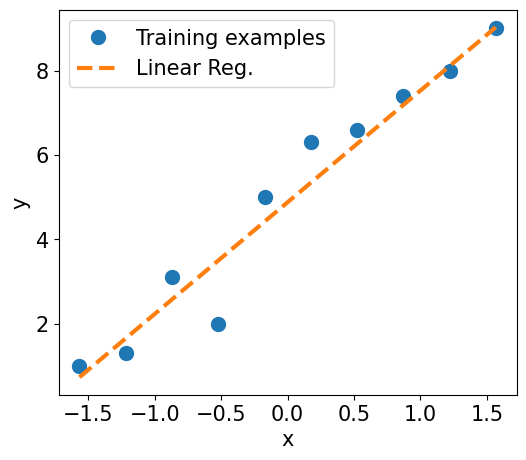

In [13]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [14]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 16.5390
Epoch 10 Loss 11.6941
Epoch 20 Loss 8.3525
Epoch 30 Loss 10.3248
Epoch 40 Loss 0.0622
Epoch 50 Loss 0.2679
Epoch 60 Loss 3.2508
Epoch 70 Loss 0.0010
Epoch 80 Loss 1.5065
Epoch 90 Loss 2.4571
Epoch 100 Loss 0.5814
Epoch 110 Loss 0.8019
Epoch 120 Loss 0.1941
Epoch 130 Loss 1.3869
Epoch 140 Loss 0.5151
Epoch 150 Loss 2.0158
Epoch 160 Loss 0.0943
Epoch 170 Loss 0.3111
Epoch 180 Loss 2.2002
Epoch 190 Loss 0.0158


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)


In [17]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return X

In [19]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [20]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# num_epochs = 100
# loss_hist = [0] * num_epochs
# accuracy_hist = [0] * num_epochs
# for epoch in range(num_epochs):
#     for x_batch, y_batch in train_dl:
#         pred = model(x_batch)
#         loss = loss_fn(pred, y_batch.long())
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         loss_hist[epoch] += loss.item()*y_batch.size(0)
#         is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#         accuracy_hist[epoch] += is_correct.mean()
#     loss_hist[epoch] /= len(train_dl.dataset)
#     accuracy_hist[epoch] /= len(train_dl.dataset)

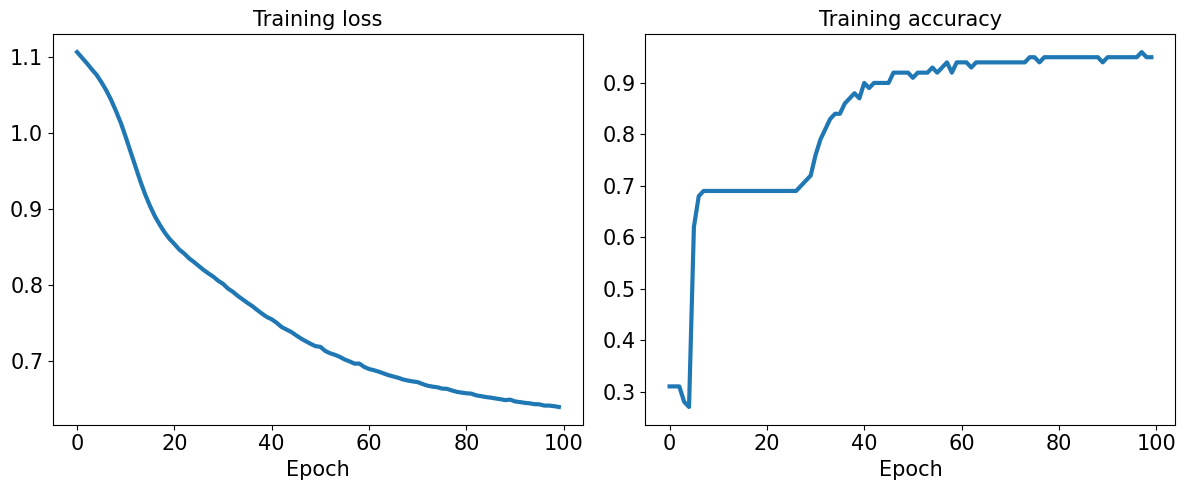

In [22]:

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

In [23]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [24]:
import pycuber as pc
from pycuber.solver import CFOPSolver

c = pc.Cube()
alg = pc.Formula()
random_alg = alg.random()

print(random_alg)
c(random_alg)

print(c)
solver = CFOPSolver(c)

solution = solver.solve(suppress_progress_messages=True)
print(solution)

print(c)

U F2 L' B D' R2 F L' B2 R F' U R B U2 F' R2 U2 B' L2 F2 D L' U' B2
         [r][b][w]
         [o][y][r]
         [o][b][o]
[b][w][y][g][o][w][b][w][g][r][y][y]
[o][r][y][o][g][g][r][o][y][r][b][g]
[g][r][y][b][y][r][w][w][r][y][w][w]
         [o][g][b]
         [b][w][g]
         [o][b][g]

R B U' F U R' D' R2 B2 D U B U B' F' U' F B U2 B' R' U' R U' B' U2 B U B' U2 B U F U2 F' U2 F U' R U' R' F' U R2 L2 D R2 L2 U R' L F2 R2 L2 B2 R' L U2
         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



In [25]:
print(c)

         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



In [26]:
print([str(x) for x in np.array(c.get_face('F')).flatten()])

['[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]']


In [27]:
pc.Square('green')

In [28]:
pc.Cubie(U=pc.Square('yellow'))

Cubie(U=Square('yellow'))

In [29]:
# # from src.train import *
# # from src.data import *


# load_sequences('./data/train_0.dat', num_sequences=1)

RNN testing

In [30]:
from torchtext.datasets import IMDB

train_dataset = IMDB(split='train')
test_dataset = IMDB(split='test')


In [31]:
from torch.utils.data import random_split

torch.manual_seed(42)

train_dataset, valid_dataset = random_split(
    list(train_dataset), [20000, 5000]
)

In [32]:
import re
from collections import Counter, OrderedDict


token_counts = Counter()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +        ' '.join(emoticons).replace('-', '')
    tokenized = text.split()
    return tokenized


for label, line in train_dataset:
    tokens = tokenizer(line)
    token_counts.update(tokens)
 
    
print('Vocab-size:', len(token_counts))


Vocab-size: 69209


In [33]:
from torchtext.vocab import vocab

sorted_by_freq_tuples = sorted(
    token_counts.items(), key=lambda x: x[1], reverse=True
)

In [34]:
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token('<pad>', 0)
vocab.insert_token('<unk>', 1)
vocab.set_default_index(1)

In [35]:
print([vocab[token] for token in ['this', 'is', 'a', 'sentence']])

[11, 7, 4, 4453]


In [36]:
text_pipline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: 1. if x == 2 else 0.

In [37]:
def collate_batch(batch):
    label_list, text_list, len_list = [], [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        len_list.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(len_list)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True
    )
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [38]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch
)

In [39]:
batch_size = 32

train_dl = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch
)

valid_dl = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch
)

test_dl = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch
)

In [40]:
embedding = nn.Embedding(
    num_embeddings=10,
    embedding_dim=3,
    padding_idx=0
)

text_encoded_input = torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 0]])

embedding(text_encoded_input)

tensor([[[-0.7269, -0.8673, -1.0324],
         [ 1.4106,  1.0425, -0.9140],
         [-0.3351,  1.5477,  0.3904],
         [-1.0513,  1.0709,  1.8281]],

        [[-0.3351,  1.5477,  0.3904],
         [ 1.1367, -0.9850, -0.0713],
         [ 1.4106,  1.0425, -0.9140],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)

In [41]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=2, batch_first=True)
        # self.rnn = nn.GRU(input_size, hidden_size, num_layers=2, batch_first=True)
        # self.rnn = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        _, hidden = self.rnn(x)
        out = hidden[-1, :, :]
        out = self.fc(out)
        return out


model = RNN(64, 32)
model

RNN(
  (rnn): RNN(64, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [42]:
model(torch.randn(5, 3, 64))

tensor([[-0.4234],
        [-0.2282],
        [ 0.0191],
        [-0.0981],
        [-0.2579]], grad_fn=<AddmmBackward0>)

In [43]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(
            out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True
        )
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [44]:
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model.to(device)
model

RNN(
  (embedding): Embedding(69211, 20, padding_idx=0)
  (rnn): LSTM(20, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [45]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += (
            (pred >= 0.5).float() == label_batch
        ).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [46]:
def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += (
                (pred >= 0.5).float() == label_batch
            ).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [47]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [48]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, 
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
         
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 10 

# torch.manual_seed(1)
 
# for epoch in range(num_epochs):
#     acc_train, loss_train = train(train_dl)
#     acc_valid, loss_valid = evaluate(valid_dl)
#     print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

In [49]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [50]:
embeddings = nn.Embedding(27, 8)
embeddings(torch.Tensor(np.arange(27)).to(torch.int64))

tensor([[-4.5493e-01,  1.9990e-01, -6.7680e-01,  2.8309e-01, -4.0100e-01,
          8.1985e-01,  2.3395e+00, -3.1527e-01],
        [ 2.1555e-01, -1.0918e+00, -2.4803e-01,  2.5366e-01, -3.7103e-01,
          1.4400e-03, -2.3248e-01, -5.5159e-01],
        [-4.6346e-01,  1.3477e+00,  1.9762e+00, -9.4071e-01,  6.9192e-01,
         -2.8465e+00, -1.2426e+00,  1.0844e+00],
        [-9.3176e-01,  6.7696e-01,  4.2922e-01,  4.7377e-01,  1.0493e-01,
         -2.0686e+00, -1.1406e+00, -1.2849e+00],
        [ 4.4974e-01, -1.0395e-01,  4.2760e-01,  8.4942e-01,  1.2246e-01,
          3.3523e-01,  6.0656e-01,  1.0180e+00],
        [ 2.6656e-01, -1.4712e+00,  1.0076e+00, -1.4387e+00, -3.7408e-01,
         -6.8943e-01,  1.8083e+00,  6.1411e-02],
        [-1.8347e-01,  1.3030e+00,  1.5816e+00,  5.5389e-01,  5.6311e-01,
          1.7039e-01,  1.2416e+00,  1.3850e+00],
        [-1.5172e+00, -1.0463e+00,  1.2908e+00,  2.1222e-01,  7.0286e-01,
          4.7603e-01, -2.7119e-01,  3.5719e-01],
        [-1.4027

In [51]:
import pycuber as pc
from pycuber import *

def convert_string_state_to_cube(string_state) -> Cube:
    '''
    Convert the string state to a Pycube object.
    ULFRBD ordered. 6 x 9 x 6 state encoding.
    '''
    cubie_set = set([eval(cubie_string) for cubie_string in string_state.split(';')])
    return pc.Cube(cubie_set)


def convert_cube_to_state(cube):
    '''
    Convert a cube object to the NN state representation.
    ULFRBD ordered. 6 x 9 x 6 state encoding.
    '''
    color_vectors = {
        'b': np.array([1, 0, 0, 0, 0, 0]),
        'g': np.array([0, 1, 0, 0, 0, 0]),
        'o': np.array([0, 0, 1, 0, 0, 0]),
        'r': np.array([0, 0, 0, 1, 0, 0]),
        'w': np.array([0, 0, 0, 0, 1, 0]),
        'y': np.array([0, 0, 0, 0, 0, 1]),
    }
    state = np.zeros(shape=(6, 9, 6))
    for i, face in enumerate('ULFRBD'):
        unpacked_face = [str(x)[1] for x in np.array(cube.get_face(face)).flatten()]
        for j, square in enumerate(unpacked_face):
            state[i, j] = color_vectors[square]
    return state.flatten()


def load_sequences(filename, num_sequences=1000):
    '''Load a train.dat file and transform it into a series of cube states to move sequences.
    '''
    move_mapping = {
        'U': 0, 'U\'': 1, 'U2': 2,
        'L': 3, 'L\'': 4, 'L2': 5,
        'F': 6, 'F\'': 1, 'F2': 8,
        'R': 9, 'R\'': 1, 'R2': 11,
        'B': 12, 'B\'': 1, 'B2': 14,
        'D': 15, 'D\'': 1, 'D2': 17, '$': 18
    }
    with open(filename, 'r') as f:
        print(f'OPENING FILE: {filename}')
        log_i = 100
        sequences = []
        for i, line in enumerate(f):
            if i == num_sequences:
                return sequences
            if i % log_i == 0:
                print(f'LINE: {i}')
            string_state, solution = line.strip().split('|')
            unsolved_cube = convert_string_state_to_cube(string_state)
            sequence = []
            for step in solution.split():
                sequence.append((convert_cube_to_state(unsolved_cube), move_mapping[step]))
                unsolved_cube.perform_step(step)
            sequence.append((convert_cube_to_state(unsolved_cube), '$'))
            sequences.append(sequence)
        return sequences

In [52]:
class CubeRNN(nn.Module):
    def __init__(self, num_pieces, embedding_dim, hidden_size, output_size, num_layers=1):
        super(CubeRNN, self).__init__()
        self.embedding = nn.Embedding(num_pieces, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=-1)
    
    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(1, x.size(0), hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        out = self.softmax(out)
        return out

flattened_cube_state = torch.arange(27)

hidden_size = 128
output_size = 12 

model = CubeRNN(27, 8, hidden_size, output_size)

input_tensor = torch.Tensor(np.arange(27)).to(torch.int64)

input_tensor = input_tensor.unsqueeze(0)

output = model(input_tensor)
print("Model Output:", output)

Model Output: tensor([[0.0659, 0.0718, 0.0836, 0.0907, 0.0802, 0.1144, 0.0817, 0.0904, 0.0834,
         0.0736, 0.0789, 0.0854]], grad_fn=<SoftmaxBackward0>)


#### we want to pull one line -- turn it into a sequence of cube states to moves -- then train on it -- then pull the next line and repeat.

In [53]:
cube = pc.Cube()

alg = pc.Formula()
random_alg = alg.random()
cube(random_alg)

index = 0
for c in cube:
    # piece_to_index_mapping[c[1]] = index
    # location_to_array_position_mapping
    print(c)
    # index += 1

('BDL', Corner(D=Square('red'), L=Square('white'), B=Square('green')))
('FDL', Corner(F=Square('red'), D=Square('white'), L=Square('blue')))
('ULF', Corner(U=Square('red'), F=Square('yellow'), L=Square('green')))
('ULB', Corner(U=Square('red'), B=Square('yellow'), L=Square('blue')))
('RUF', Corner(F=Square('orange'), R=Square('white'), U=Square('blue')))
('RUB', Corner(U=Square('orange'), B=Square('yellow'), R=Square('blue')))
('RDB', Corner(D=Square('orange'), B=Square('yellow'), R=Square('green')))
('RDF', Corner(R=Square('orange'), D=Square('white'), F=Square('green')))
('LU', Edge(L=Square('yellow'), U=Square('green')))
('FU', Edge(U=Square('red'), F=Square('white')))
('RU', Edge(U=Square('red'), R=Square('yellow')))
('BU', Edge(U=Square('orange'), B=Square('green')))
('LF', Edge(L=Square('orange'), F=Square('blue')))
('LB', Edge(L=Square('white'), B=Square('blue')))
('RF', Edge(F=Square('white'), R=Square('green')))
('RB', Edge(R=Square('orange'), B=Square('white')))
('FD', Edge(F

do we even need centers?

In [54]:
def encode_cube(cube, piece_to_index_mapping, location_to_array_position_mapping):
    cube_array = [None for _ in range(26)]
    for i, cubie_tuple in enumerate(cube):
        location, cubie = cubie_tuple
        squares = []
        for square in cubie:
            squares.append(str(square[1]))
        squares = tuple(squares)
        cube_array[location_to_array_position_mapping[location]] = piece_to_index_mapping[squares]
    return torch.Tensor([c for c in cube_array]).to(torch.int64)

def encode_move(move):
    move_mapping = {
        'U': 0, 'U\'': 1,
        'L': 2, 'L\'': 3,
        'F': 4, 'F\'': 5,
        'R': 6, 'R\'': 7,
        'B': 8, 'B\'': 9,
        'D': 10, 'D\'': 11,
        '$': 12
    }
    return move_mapping[move]

def get_sequences(filename, num_sequences=1000):
    sequences = []
    with open(filename, 'r') as f:
        for line in f:
            if len(sequences) == num_sequences:
                return sequences
            cubies_string, solution_string = line.split('|')
            solution_string.translate(str.maketrans({'U2': 'U U', 'L2': 'L L', 'R2': 'R R', 'F2': 'F F', 'D2': 'D D', 'B2': 'B B'}))
            cubies_set = set([eval(cubie_string) for cubie_string in cubies_string])
            cube = pc.Cube(cubies_set)
            moves = solution_string.split()
            cube_states = []
            move_states = []
            for move in moves:
                cube_states.append(encode_cube(cube))
                move_states.append(encode_move(move))
                cube.perform_step(move)
            cube_states.append(encode_cube(cube))
            move_states.append(encode_move('$'))
            sequences.append(cube_states, move_states)
    return sequences

In [55]:
piece_to_index_mapping = {}
location_to_array_position_mapping = {}

cube = pc.Cube()
index = 0
for c in cube:
    piece_to_index_mapping[tuple([str(square[1]) for square in c[1]])] = index
    location_to_array_position_mapping[c[0]] = index
    index += 1


In [56]:
location_to_array_position_mapping

{'BDL': 0,
 'FDL': 1,
 'ULF': 2,
 'ULB': 3,
 'RUF': 4,
 'RUB': 5,
 'RDB': 6,
 'RDF': 7,
 'LU': 8,
 'FU': 9,
 'RU': 10,
 'BU': 11,
 'LF': 12,
 'LB': 13,
 'RF': 14,
 'RB': 15,
 'FD': 16,
 'LD': 17,
 'BD': 18,
 'RD': 19,
 'F': 20,
 'U': 21,
 'R': 22,
 'L': 23,
 'D': 24,
 'B': 25}

In [57]:
piece_to_index_mapping

{('[r]', '[w]', '[b]'): 0,
 ('[r]', '[w]', '[g]'): 1,
 ('[r]', '[y]', '[g]'): 2,
 ('[r]', '[y]', '[b]'): 3,
 ('[o]', '[y]', '[g]'): 4,
 ('[o]', '[y]', '[b]'): 5,
 ('[o]', '[w]', '[b]'): 6,
 ('[o]', '[w]', '[g]'): 7,
 ('[r]', '[y]'): 8,
 ('[y]', '[g]'): 9,
 ('[o]', '[y]'): 10,
 ('[y]', '[b]'): 11,
 ('[r]', '[g]'): 12,
 ('[r]', '[b]'): 13,
 ('[o]', '[g]'): 14,
 ('[o]', '[b]'): 15,
 ('[w]', '[g]'): 16,
 ('[r]', '[w]'): 17,
 ('[w]', '[b]'): 18,
 ('[o]', '[w]'): 19,
 ('[g]',): 20,
 ('[y]',): 21,
 ('[o]',): 22,
 ('[r]',): 23,
 ('[w]',): 24,
 ('[b]',): 25}

In [58]:
from pycuber.solver import CFOPSolver

for i in range(5):
    print(f'CUBE {i}:')
    cube = pc.Cube()
    alg = pc.Formula()
    random_alg = alg.random()
    cube(random_alg)
    original_cube = cube.copy()
    print(f'SCRAMBLED:\n{encode_cube(cube, piece_to_index_mapping, location_to_array_position_mapping)}')
    print(cube)
    print()
    solver = CFOPSolver(cube)
    solution = solver.solve(cube)
    print(solution)
    original_cube.perform_algo(solution)
    print(f'SOLVED:\n{encode_cube(original_cube, piece_to_index_mapping, location_to_array_position_mapping)}')
    print(original_cube)
    print()
    print()

CUBE 0:
SCRAMBLED:
tensor([ 7,  3,  2,  0,  4,  1,  6,  5, 16, 18, 10, 15,  8, 14, 11,  9, 12, 17,
        19, 13, 20, 21, 22, 23, 24, 25])
         [r][b][r]
         [g][y][o]
         [r][w][y]
[w][w][g][y][b][g][o][y][w][g][o][b]
[o][r][y][r][g][b][y][o][g][y][b][g]
[w][r][r][b][g][b][o][b][o][b][o][o]
         [y][r][y]
         [w][w][r]
         [g][w][w]


U2 R' B2 U F R' U2 R' U R U R' L U' L' U R' U' R F U2 F' U' B' U' B U F U F' L' U L F U F' U R U B U' B' R' U R' U' R B2 D L' U L U' L D' B2
SOLVED:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])
         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



CUBE 1:
SCRAMBLED:
tensor([ 0,  1,  6,  4,  7,  5,  2,  3, 19, 17, 13,  8,  9, 11, 14, 18, 12, 15,
        16, 10, 20, 21, 22, 23, 24, 

In [59]:
# sequences = get_sequences('data/train_0.dat', num_sequences=100)

# num_pieces = 27
# embedding_dim = 16 
# hidden_size = 128
# output_size = 13
# num_layers = 1

# model = CubeRNN(num_pieces, embedding_dim, hidden_size, output_size, num_layers)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [60]:
output[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [61]:
import random
import pycuber as pc
from pycuber import *

def encode_cube(cube):
    piece_to_index_mapping = {}
    location_to_array_position_mapping = {}
    mapping_cube = pc.Cube()
    index = 0
    for c in mapping_cube:
        piece_to_index_mapping[tuple([str(square[1]) for square in c[1]])] = index
        location_to_array_position_mapping[c[0]] = index
        index += 1
    cube_array = [None for _ in range(26)]
    for i, cubie_tuple in enumerate(cube):
        location, cubie = cubie_tuple
        squares = []
        for square in cubie:
            squares.append(str(square[1]))
        squares = tuple(squares)
        cube_array[location_to_array_position_mapping[location]] = piece_to_index_mapping[squares]
    print(cube_array)
    return torch.Tensor([c for c in cube_array]).to(torch.int64)


def encode_move(move):
    move_mapping = {
        'U': 0, 'U\'': 1,
        'L': 2, 'L\'': 3,
        'F': 4, 'F\'': 5,
        'R': 6, 'R\'': 7,
        'B': 8, 'B\'': 9,
        'D': 10, 'D\'': 11,
        '$': 12
    }
    return move_mapping[move]


def random_line(filename, prev_lines):
    with open(filename, 'r') as file:
        rand_line = next(file)
        rand_num = 0
        for num, line in enumerate(file, 2):
            if random.randrange(num) or num in prev_lines:
                continue
            rand_line = line
            rand_num = num
        return rand_num, rand_line


def yield_sequences(filename, num_sequences=1000):
    i = 0
    prev_lines = []
    while i < num_sequences:
        line_num, line = random_line(filename, prev_lines)
        print(line)
        prev_lines.append(line_num)
        cubies_string, solution_string = line.split('|')
        mapping = {'U2': 'U U', 'L2': 'L L', 'R2': 'R R', 'F2': 'F F', 'D2': 'D D', 'B2': 'B B'}
        for k, v in mapping.items():
            solution_string = solution_string.replace(k, v)
        cubies_set = set([eval(cubie_string) for cubie_string in cubies_string.split(';')])
        cube = pc.Cube(cubies_set)
        print(cube)
        moves = solution_string.split()
        cube_states = []
        move_states = []
        for move in moves:
            cube_states.append(encode_cube(cube))
            move_states.append(encode_move(move))
            cube.perform_step(move)
        cube_states.append(encode_cube(cube))
        move_states.append(encode_move('$'))
        if i % 100 == 0:
            print(f'Sequnce {i} of {num_sequences}')
        i += 1
        sequence = cube_states, move_states
        print(sequence)
        yield sequence

In [62]:
for sequence in yield_sequences('data/train_0.dat', num_sequences=1):
    for state in sequence[0]:
        print(state.numpy())
        print()
    print(sequence[1])

Corner(D=Square('red'), L=Square('yellow'), B=Square('blue'));Corner(D=Square('orange'), L=Square('yellow'), F=Square('blue'));Corner(U=Square('red'), L=Square('white'), F=Square('green'));Corner(L=Square('red'), B=Square('yellow'), U=Square('green'));Corner(U=Square('red'), R=Square('white'), F=Square('blue'));Corner(U=Square('orange'), R=Square('white'), B=Square('blue'));Corner(B=Square('orange'), R=Square('yellow'), D=Square('green'));Corner(D=Square('orange'), F=Square('white'), R=Square('green'));Edge(U=Square('orange'), L=Square('blue'));Edge(F=Square('yellow'), U=Square('green'));Edge(R=Square('red'), U=Square('green'));Edge(U=Square('red'), B=Square('white'));Edge(F=Square('red'), L=Square('yellow'));Edge(B=Square('white'), L=Square('green'));Edge(R=Square('orange'), F=Square('white'));Edge(B=Square('orange'), R=Square('green'));Edge(D=Square('red'), F=Square('blue'));Edge(D=Square('white'), L=Square('blue'));Edge(B=Square('yellow'), D=Square('blue'));Edge(D=Square('orange'), 

In [63]:
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader
from pycuber.solver import CFOPSolver
from datetime import datetime
import torch.optim as optim
import torch.nn as nn
import pycuber as pc
from pycuber import *
import pandas as pd
import numpy as np
import random
import torch
import math
import os


def encode_cube(cube):
    piece_to_index_mapping = {}
    location_to_array_position_mapping = {}
    mapping_cube = pc.Cube()
    index = 0
    for c in mapping_cube:
        piece_to_index_mapping[tuple([str(square[1]) for square in c[1]])] = index
        location_to_array_position_mapping[c[0]] = index
        index += 1
    cube_array = [None for _ in range(26)]
    for i, cubie_tuple in enumerate(cube):
        location, cubie = cubie_tuple
        squares = []
        for square in cubie:
            squares.append(str(square[1]))
        squares = tuple(squares)
        cube_array[location_to_array_position_mapping[location]] = piece_to_index_mapping[squares]
    return torch.Tensor([c for c in cube_array]).to(torch.int64)


def encode_move(move):
    move_mapping = {
        'U': 0, 'U\'': 1,
        'L': 2, 'L\'': 3,
        'F': 4, 'F\'': 5,
        'R': 6, 'R\'': 7,
        'B': 8, 'B\'': 9,
        'D': 10, 'D\'': 11,
        '$': 12
    }
    return move_mapping[move]


def random_line(filename, prev_lines):
    with open(filename, 'r') as file:
        rand_line = next(file)
        rand_num = 0
        for num, line in enumerate(file, 2):
            if random.randrange(num) or num in prev_lines:
                continue
            rand_line = line
            rand_num = num
        return rand_num, rand_line

def yield_sequences(filename, num_sequences=1000):
    i = 0
    prev_lines = []
    while i < num_sequences:
        line_num, line = random_line(filename, prev_lines)
        prev_lines.append(line_num)
        cubies_string, solution_string = line.split('|')
        mapping = {'U2': 'U U', 'L2': 'L L', 'R2': 'R R', 'F2': 'F F', 'D2': 'D D', 'B2': 'B B'}
        for k, v in mapping.items():
            solution_string = solution_string.replace(k, v)
        cubies_set = set([eval(cubie_string) for cubie_string in cubies_string.split(';')])
        cube = pc.Cube(cubies_set)
        moves = solution_string.split()
        cube_states = []
        move_states = []
        for move in moves:
            cube_states.append(encode_cube(cube))
            move_states.append(encode_move(move))
            cube.perform_step(move)
        cube_states.append(encode_cube(cube))
        move_states.append(encode_move('$'))
        if i % 100 == 0:
            print(f'Sequnce {i} of {num_sequences}')
        i += 1
        sequence = cube_states, move_states
        yield sequence


def train_one_epoch(epoch_index, tb_writer, model, device, num_sequences):
    running_loss = 0.
    last_loss = 0.
    for i, sequence in enumerate(yield_sequences('../data/train_0.dat', num_sequences=num_sequences)):
        cube_states, move_states = sequence
        input_tensor = torch.stack(cube_states).to(device)
        output_tensor = torch.Tensor(move_states).to(torch.int64).to(device)
        optimizer.zero_grad()
        outputs = model(input_tensor)
        loss = loss_fn(outputs, output_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_loss += loss.item()
        if i % 10 == 0:
            last_loss = running_loss / num_sequences 
            print(f'    batch {i} loss: {last_loss}')
            tb_x = epoch_index * num_sequences + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            # running_loss = 0.
    return last_loss

In [64]:
import torch

sentence = torch.arange(0, 8)

In [65]:
idx = torch.randperm(sentence.nelement())
sentence = sentence.view(-1)[idx].view(sentence.size())
# sentence.view(-1)[idx].view(sentence.size())

In [66]:
sentence

tensor([2, 7, 3, 4, 6, 0, 1, 5])

In [67]:
embed = torch.nn.Embedding(10, 16)
embedded_sentence = embed(sentence).detach()
embedded_sentence.shape

torch.Size([8, 16])

In [68]:
omega = embedded_sentence.matmul(embedded_sentence.T)
omega

tensor([[30.5859, -1.6835, -5.0010, -4.5412, 10.3589,  0.5859,  2.8233, -2.3926],
        [-1.6835, 10.3304,  0.9520,  0.0650, -2.0344,  1.8744, -1.0258, -2.1827],
        [-5.0010,  0.9520,  9.8521,  0.7721, -3.6917, -0.8281, -0.0680, -0.8761],
        [-4.5412,  0.0650,  0.7721,  8.1944, -2.6785, -0.7268,  2.1990,  2.0559],
        [10.3589, -2.0344, -3.6917, -2.6785, 13.2716, -2.7364,  0.1823,  0.4077],
        [ 0.5859,  1.8744, -0.8281, -0.7268, -2.7364, 10.7646,  2.2258,  0.7146],
        [ 2.8233, -1.0258, -0.0680,  2.1990,  0.1823,  2.2258, 11.2329,  6.7669],
        [-2.3926, -2.1827, -0.8761,  2.0559,  0.4077,  0.7146,  6.7669, 17.1591]])

In [69]:
import torch.nn.functional as F

attention_weights = F.softmax(omega, dim=1)
attention_weights

tensor([[1.0000e+00, 9.6735e-15, 3.5060e-16, 5.5526e-16, 1.6425e-09, 9.3580e-14,
         8.7674e-13, 4.7603e-15],
        [6.0575e-06, 9.9964e-01, 8.4502e-05, 3.4805e-05, 4.2648e-06, 2.1255e-04,
         1.1693e-05, 3.6769e-06],
        [3.5420e-07, 1.3633e-04, 9.9965e-01, 1.1389e-04, 1.3118e-06, 2.2987e-05,
         4.9161e-05, 2.1910e-05],
        [2.9277e-06, 2.9307e-04, 5.9440e-04, 9.9434e-01, 1.8858e-05, 1.3277e-04,
         2.4761e-03, 2.1458e-03],
        [5.1530e-02, 2.1366e-07, 4.0736e-08, 1.1221e-07, 9.4846e-01, 1.0589e-07,
         1.9607e-06, 2.4566e-06],
        [3.7955e-05, 1.3767e-04, 9.2288e-06, 1.0213e-05, 1.3690e-06, 9.9956e-01,
         1.9564e-04, 4.3168e-05],
        [2.2009e-04, 4.6878e-06, 1.2216e-05, 1.1789e-04, 1.5689e-05, 1.2109e-04,
         9.8815e-01, 1.1358e-02],
        [3.2269e-09, 3.9804e-09, 1.4701e-08, 2.7587e-07, 5.3081e-08, 7.2148e-08,
         3.0670e-05, 9.9997e-01]])

In [70]:
attention_weights.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [71]:
context_vectors = torch.matmul(attention_weights, embedded_sentence)
context_vectors

tensor([[ 1.8214e-01, -1.8071e+00,  2.3507e+00, -1.0171e+00,  9.3166e-01,
         -1.1708e-01,  6.4920e-01,  5.5399e-01, -1.5104e+00,  2.8744e+00,
          1.8704e+00,  1.2297e+00, -2.8569e-01,  1.4936e+00,  9.4406e-01,
         -5.9935e-01],
        [-3.9658e-01, -1.4014e+00,  1.1160e-01,  7.8798e-01,  5.8859e-01,
         -5.3292e-02, -8.8156e-01, -2.5182e-01,  8.0266e-02, -1.1236e-03,
         -1.2436e+00, -1.4629e+00,  1.2504e+00,  2.6471e-01,  9.8724e-01,
          2.7972e-01],
        [-6.3173e-01,  6.3181e-01,  3.2120e-01,  9.0285e-02,  6.8418e-01,
          3.5224e-01,  5.9307e-01, -1.1164e+00,  2.0550e+00, -5.1463e-01,
         -6.0559e-01, -2.7657e-01,  1.6238e-02,  1.2465e+00, -4.2071e-01,
          2.8885e-01],
        [-4.3178e-01, -5.4785e-02, -2.3598e-01,  3.6818e-01, -2.4583e-03,
         -1.0478e+00,  4.0684e-01, -1.8021e+00,  4.5521e-01,  4.1029e-03,
          5.4243e-02,  8.0920e-02,  8.3607e-02, -1.7221e+00, -4.4488e-02,
         -1.9827e-01],
        [ 1.2266e+00